Task:
image classification by neural network (except CNN)

***main part of text and code from***

[TF An implementation of a Convolutional Neural Network in tf.keras – MNIST dataset](https://datahacker.rs/mnist-tensorflow/)

#Import libraries


In [1]:
pip install --upgrade keras

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SimpleRNN, Input
from sklearn.metrics import confusion_matrix

print(keras.__version__)

3.6.0


In [3]:
np.random.seed(42)

#load data

## load data and split into train test set

After imports, we can use imported module to load mnist data. The load_data() function will automatically download and split our data into train and test sets.

Let us check the shape of new data. We can also plot some digits to see how they look

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [5]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


#plot first digits

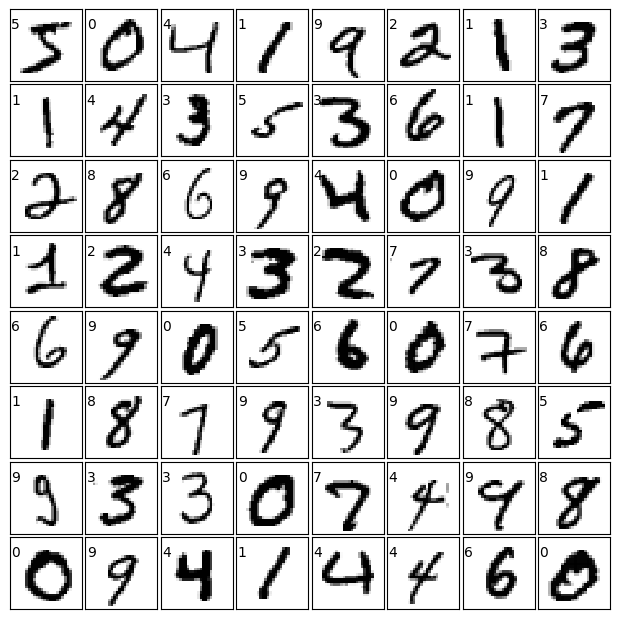

In [6]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

#Reshape

Now it is important to reshape our X_train and X_test arrays to be of the shapes (60000, 28, 28, 1) and (10000, 28, 28, 1) respectively. This is done because our network will accept images of shape (1, 28, 28, 1) and no dimension can be None.

In [7]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


#One Hot Encoding

Many machine learning algorithms cannot analyze categorical data directly. That is, neurons usually output either 0 or 1. Hence, if we have a digit class going from “0” to “9” we will use 10 binary output neurons. This is known as a one hot encoding. [1]. Hence, if the output should be digit 5, the 6th neuron should output 1, and all the remaining should be zeros. Note, that the first neuron is active for a “zero” digit.

In [8]:
#y_train before encoding
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


In [10]:
#y_train after encodin
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

as we see now it is encoded to array, where each row consist of len numbers and number of class is 1 and other 0

#Implementing a Neural Network

When all data is loaded and prepared, it is time to create a model. We will use a simple Sequential API in order to do this. Mnist dataset is not too complicated, so there is no need to create a complicated network

To make this work in Keras we need to compile a model. An important choice to make is the loss function. We use the categorical_crossentropy loss because it measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class). In other words, this loss function is used to solve a multi-class classification problem.

For optimization algorithm, let’s choose Adam, which is a combination of RMSprop and Stochastic Gradient Descent with momentum.

## hyperparameters

In [11]:
# Hyperparameters
training_epochs = 5 # Total number of training epochs
learning_rate = 0.003 # The learning rate

In [12]:
# create a model
def create_model():
    model = Sequential()

    model.add(Input (shape=(28, 28, 1)))
    model.add(Dense (256, activation='relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 28, 28, 256)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,693,066 (98.01 MB)

 Trainable params: 25,692,554 (98.01 MB)

 Non-trainable params: 512 (2.00 KB)

#train model

In [13]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/5
1875/1875 - 22s - 12ms/step - accuracy: 0.9128 - loss: 0.5048 - val_accuracy: 0.9245 - val_loss: 0.2699
Epoch 2/5
1875/1875 - 14s - 8ms/step - accuracy: 0.9363 - loss: 0.2319 - val_accuracy: 0.9056 - val_loss: 0.3628
Epoch 3/5
1875/1875 - 13s - 7ms/step - accuracy: 0.9430 - loss: 0.2104 - val_accuracy: 0.9492 - val_loss: 0.1838
Epoch 4/5
1875/1875 - 21s - 11ms/step - accuracy: 0.9478 - loss: 0.1986 - val_accuracy: 0.9296 - val_loss: 0.3361
Epoch 5/5
1875/1875 - 13s - 7ms/step - accuracy: 0.9528 - loss: 0.1814 - val_accuracy: 0.9485 - val_loss: 0.2017


#test model

Model can generate output predictions for the input samples.


In [14]:
prediction_values = model.predict(X_test)
prediction_labels = np.argmax(prediction_values, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#evaluate model

In [15]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.1625, accuracy: 95.4400%
Evaluating on testing set...
loss=0.2017, accuracy: 94.8500%


 It's not a bad result, but it's worse than doing it with CNN:


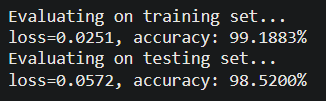

#Summarize history for accuracy and loss

Maximum Loss : 0.5048
Minimum Loss : 0.1814
Loss difference : 0.3234


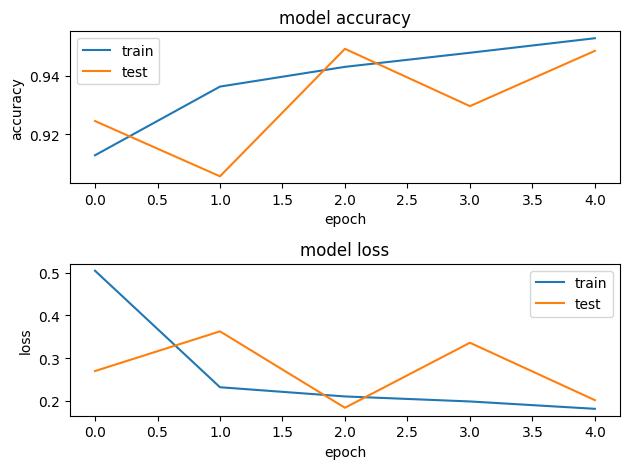

In [16]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

To see where our model makes a lot of mistakes, let’s make use of a confusion matrix, which is also known as an error matrix. Here, on the left side we have a true value, while on the bottom we have predicted value. Their intersection represents how much these pairs we have. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

We can also save the weights of our trained model for later use by calling the save_weights function.


#Confusion matrix

Text(0.5, 23.52222222222222, 'Predicted')

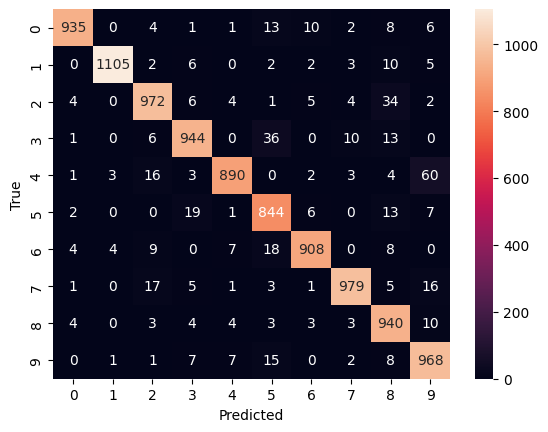

In [17]:
Y_true = np.argmax(y_test, axis=1)
prediction_labels = np.argmax(prediction_values, axis=1)
confusion_mtx = confusion_matrix(Y_true, prediction_labels)
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

# Visualization and Testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


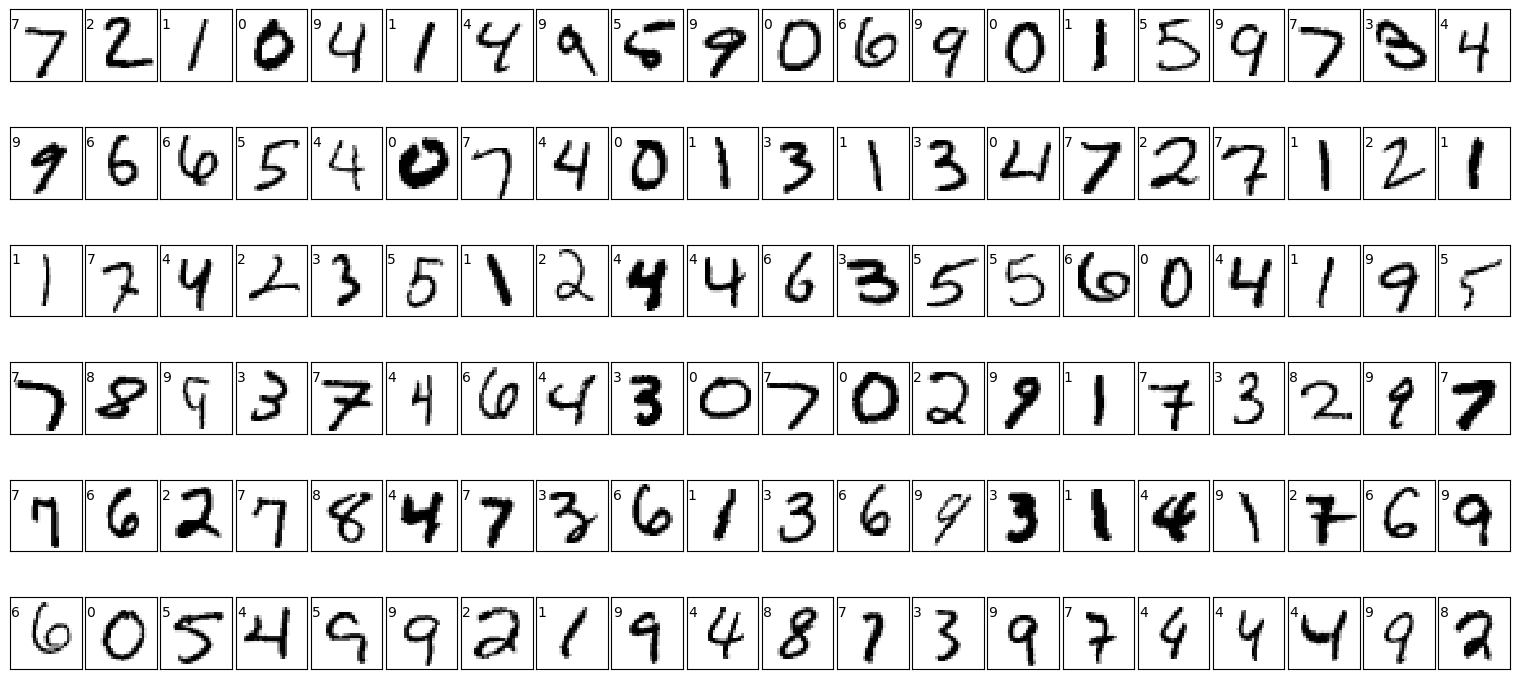

In [18]:
prediction_values = model.predict(X_test)
prediction_labels = np.argmax(prediction_values, axis=1)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(prediction_labels[i]))